In [1]:
import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import anndata as ad
import pandas as pd

In [2]:
adata = sc.read_h5ad('../../results/03_integrate_scrna/integrated.h5ad')

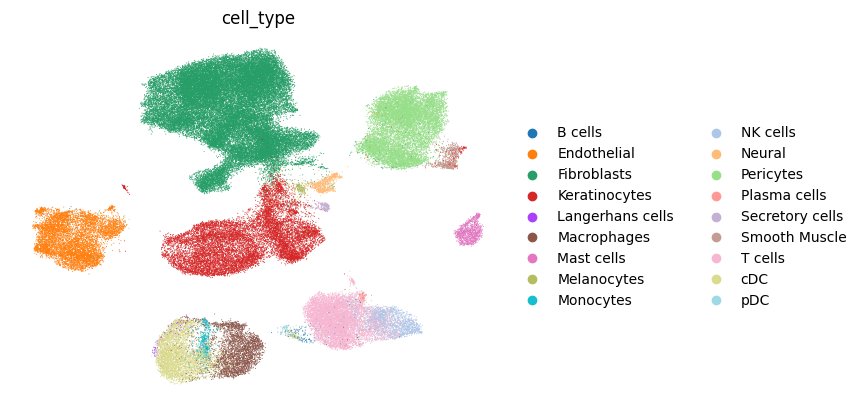

In [3]:
sc.pl.umap(adata, color='cell_type', frameon=False, size=2)

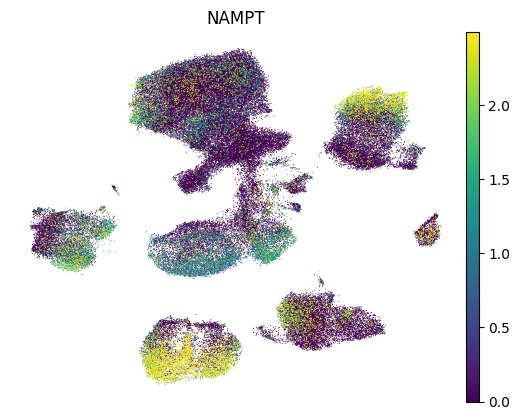

In [4]:
sc.pl.umap(adata, color='NAMPT', size=2, frameon=False, vmax='p95', vmin='p5')

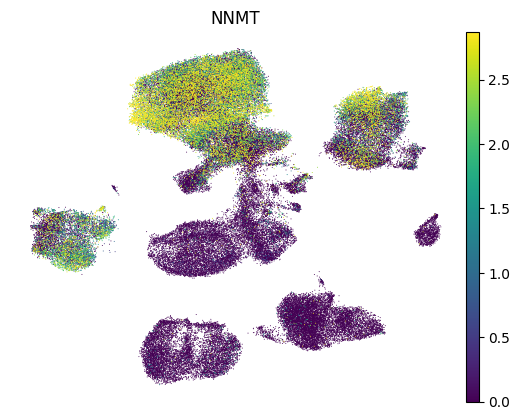

In [5]:
sc.pl.umap(adata, color='NNMT', size=2, frameon=False, vmax='p95', vmin='p5')

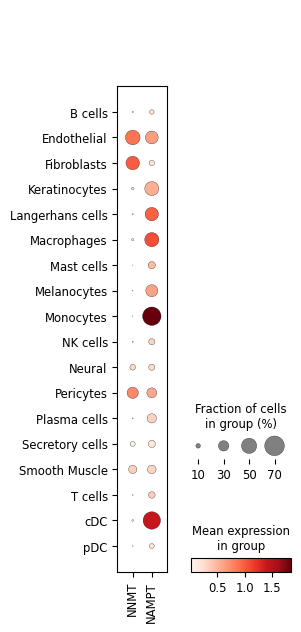

In [6]:
sc.pl.dotplot(adata, ['NNMT', 'NAMPT'], groupby='cell_type')

In [14]:
adata.obs['condition_cell_type'] =adata.obs['cell_type'].astype(str) + "_" + adata.obs['condition'].astype(str)

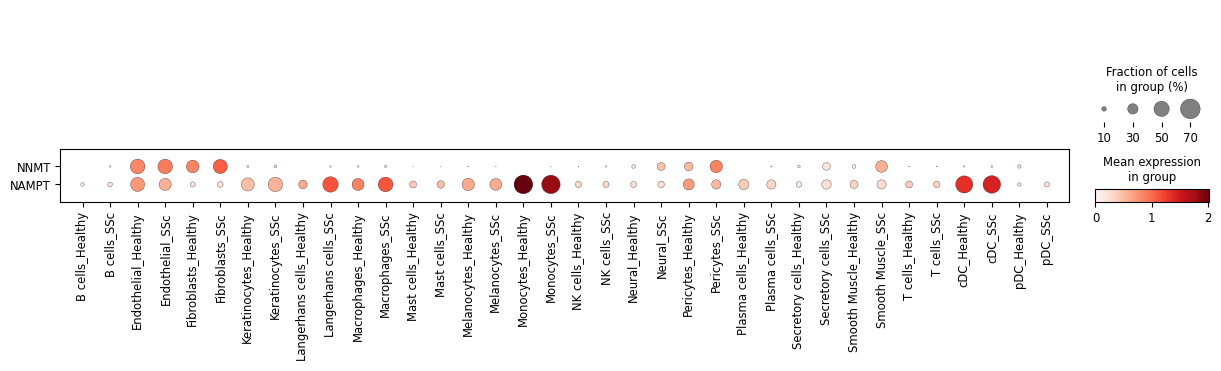

In [16]:
sc.pl.dotplot(adata, ['NNMT', 'NAMPT'], groupby='condition_cell_type', swap_axes=True)

In [17]:
adata1 = adata[adata.obs['cell_type'] == 'Fibroblasts']

In [21]:
adata1.uns['log1p']['base'] = None
sc.tl.rank_genes_groups(adata1, 'condition', method='wilcoxon')

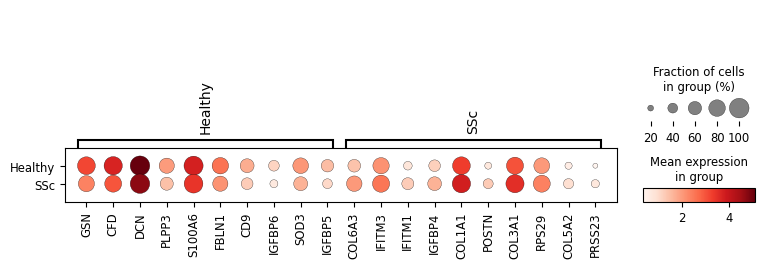

In [23]:
sc.pl.rank_genes_groups_dotplot(adata1, n_genes=10, use_raw=False)